In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import levene
from statsmodels.formula.api import ols


warnings.filterwarnings('ignore')

nutrition_data=pd.read_excel('NutritionStudy.xls')

# Task 1

The "PRIORSMOKE" variable has three levels: 1, 2, and 3.

In [30]:
unique_prior_smoke = nutrition_data['PriorSmoke'].unique()
unique_prior_smoke.sort()
unique_prior_smoke

array([1, 2, 3])

In [31]:
cholesterol_stats_by_prior_smoke = nutrition_data.groupby('PriorSmoke')['Cholesterol'].describe()
cholesterol_stats_by_prior_smoke

,count,mean,std,min,25%,50%,75%,max
PriorSmoke,,,,,,,,
1,157.0,228.391083,134.228448,37.7,141.2,195.8,271.80,900.7
2,115.0,250.424348,121.691586,46.3,160.4,216.7,340.55,747.5
3,43.0,272.532558,145.919098,78.3,174.3,239.2,343.25,718.8



## Task 1: Descriptive Statistics and ANOVA Analysis for CHOLESTEROL by PRIORSMOKE

### Descriptive Statistics

The descriptive statistics for the "CHOLESTEROL" variable, grouped by the "PRIORSMOKE" levels, are summarized in the following table:

| PriorSmoke Level | Count (n) | Mean     | Standard Deviation (s) | Min  | Max  |
|------------------|-----------|----------|------------------------|------|------|
| 1                | 157       | 228.39   | 134.23                 | 37.7 | 900.7|
| 2                | 115       | 250.42   | 121.69                 | 46.3 | 747.5|
| 3                | 43        | 272.53   | 145.92                 | 78.3 | 718.8|

### ANOVA Analysis

To test for mean differences in cholesterol between the "PRIORSMOKE" groups, an Analysis of Variance (ANOVA) was performed. The results are as follows:

- **\( F \)-statistic:** 2.235
- **\( p \)-value:** 0.109

### Interpretation

The \( p \)-value obtained from the ANOVA test is greater than the typical significance level of 0.05. Consequently, we fail to reject the null hypothesis, signifying that there is insufficient evidence to conclude that there are significant differences in the mean cholesterol levels across the different "PRIORSMOKE" groups.

This analysis suggests that, according to the data provided, prior smoking status (categorized into three levels) does not have a statistically significant impact on cholesterol levels.

# Task 2

In [32]:

prior_smoke_dummies = pd.get_dummies(nutrition_data['PriorSmoke'], prefix='PriorSmoke', drop_first=True)

nutrition_data_with_dummies = pd.concat([nutrition_data, prior_smoke_dummies], axis=1)

nutrition_data_with_dummies[['PriorSmoke', 'PriorSmoke_2', 'PriorSmoke_3']].head()


,PriorSmoke,PriorSmoke_2,PriorSmoke_3
0,2,True,False
1,1,False,False
2,2,True,False
3,2,True,False
4,1,False,False


In [33]:
from sklearn.linear_model import LinearRegression

# Defining the response variable (Y) and explanatory variables (X's)
Y = nutrition_data_with_dummies['Cholesterol']
X = nutrition_data_with_dummies[['PriorSmoke_2', 'PriorSmoke_3']]

# Creating a linear regression model (Model 1)
model_1 = LinearRegression()

# Fitting the model
model_1.fit(X, Y)

# Getting the coefficients and intercept
coefficients_model_1 = model_1.coef_
intercept_model_1 = model_1.intercept_

# Preparing the results for markdown
coefficients_model_1, intercept_model_1

(array([22.03326502, 44.14147534]), 228.39108280254771)


## Dummy Variables

- `PriorSmoke_2`: Represents the second level of "PRIORSMOKE" (1 for level 2, 0 otherwise)
- `PriorSmoke_3`: Represents the third level of "PRIORSMOKE" (1 for level 3, 0 otherwise)

The first level of "PRIORSMOKE" is left out and will serve as the "basis of interpretation.

### Prediction Equation

The prediction equation for the linear regression model (Model 1) using the dummy-coded variables for "PRIORSMOKE" to predict "CHOLESTEROL" is given by:

$$\text{CHOLESTEROL} = 228.39 + 22.03 \times \text{PriorSmoke\_2} + 44.14 \times \text{PriorSmoke\_3}$$

### Interpretation of Coefficients

- **Intercept (228.39):** This is the predicted cholesterol level for the "basis of interpretation," which is the first level of "PRIORSMOKE."

- **PriorSmoke\_2 Coefficient (22.03):** This coefficient represents the difference in the predicted cholesterol level between level 2 and level 1 of "PRIORSMOKE." A value of 22.03 suggests that individuals in level 2 of "PRIORSMOKE" have, on average, 22.03 units higher cholesterol than those in level 1.

- **PriorSmoke\_3 Coefficient (44.14):** This coefficient represents the difference in the predicted cholesterol level between level 3 and level 1 of "PRIORSMOKE." A value of 44.14 suggests that individuals in level 3 of "PRIORSMOKE" have, on average, 44.14 units higher cholesterol than those in level 1.

### Coefficient Table

| Variable      | Coefficient |
|---------------|-------------|
| Intercept     | 228.39      |
| PriorSmoke_2  | 22.03       |
| PriorSmoke_3  | 44.14       |

### Comparison with ANOVA Model from task 1

- **ANOVA Model:** The ANOVA test in Task 1 did not reveal any significant differences in mean cholesterol levels across the different "PRIORSMOKE" groups (p-value = 0.109).

- **Regression Model (Model 1):** The linear regression model quantifies the differences in cholesterol levels between the different "PRIORSMOKE" groups. It provides specific coefficients that represent these differences.

The regression model offers a more detailed perspective by quantifying the differences between the groups, while the ANOVA model provides a broader test for any mean differences. The results are consistent in the sense that both models acknowledge variations in cholesterol levels across the "PRIORSMOKE" groups, but the regression model provides a numerical representation of these differences.

# Task 3

In [34]:
import statsmodels.api as sm
nutrition_data_with_dummies['PriorSmoke_2']=nutrition_data_with_dummies['PriorSmoke_2'].astype('int64')
nutrition_data_with_dummies['PriorSmoke_3']=nutrition_data_with_dummies['PriorSmoke_3'].astype('int64')
Y_model_2 = nutrition_data_with_dummies['Cholesterol']
X_model_2 = nutrition_data_with_dummies[['PriorSmoke_2', 'PriorSmoke_3', 'Fat']]
X_model_2 = sm.add_constant(X_model_2)

model_2 = sm.OLS(Y_model_2, X_model_2)

results_model_2 = model_2.fit()

summary_model_2 = results_model_2.summary()
summary_model_2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cholesterol   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     105.7
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           3.43e-47
Time:                        04:01:42   Log-Likelihood:                -1873.8
No. Observations:                 315   AIC:                             3756.
Df Residuals:                     311   BIC:                             3771.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           28.9401     13.585      2.130      0.034       2.210      55.670
PriorSmoke_2    -2.1142     11.537     -0.183      0.855     -24.815      20.587
PriorSmoke_3    10.6358     16.176      0.657      0.511     -21.193      42.465
Fat              2.7630      0.157     17.556      0.000       2.453       3.073
==============================================================================
Omnibus:                      137.163   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              732.464
Skew:                           1.748   Prob(JB):                    8.86e-160
Kurtosis:                       9.602   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction Model

The prediction model for Model 2, using the "FAT" continuous variable and the "PRIORSMOKE" dummy-coded variables to predict "CHOLESTEROL," is given by:

$$ \text{CHOLESTEROL} = 28.94 - 2.11 \times \text{PriorSmoke\_2} + 10.64 \times \text{PriorSmoke\_3} + 2.76 \times \text{Fat} $$

## Interpretation of Coefficients

- **Intercept (28.94):** The predicted cholesterol level when all other variables are zero. This serves as the basis of interpretation for the constant term.

- **PriorSmoke\_2 Coefficient (-2.11):** Represents the difference in cholesterol levels between level 2 and level 1 of "PRIORSMOKE," after controlling for "FAT." The negative value suggests a slight decrease, but the coefficient is not statistically significant (p-value = 0.855).

- **PriorSmoke\_3 Coefficient (10.64):** Represents the difference in cholesterol levels between level 3 and level 1 of "PRIORSMOKE," after controlling for "FAT." The coefficient is not statistically significant (p-value = 0.511).

- **Fat Coefficient (2.76):** Represents the change in cholesterol levels for a one-unit increase in "FAT." It is statistically significant (p-value < 0.001), suggesting a strong positive relationship between fat intake and cholesterol levels.

## Hypothesis Test Results

- **Overall Model Significance:** The model is statistically significant with an F-statistic of 105.7 and a p-value < 0.001.

- **Individual Coefficients:** The "Fat" variable is significant, while the coefficients for the "PRIORSMOKE" dummy variables are not.

## Goodness of Fit Statistics

- **R-squared:** 0.505, indicating that approximately 50.5% of the variability in cholesterol levels is explained by the model.

- **Adjusted R-squared:** 0.500, providing a more unbiased estimate considering the number of predictors.

## Diagnostic Graphs and Statistics

- **Durbin-Watson:** 2.089, suggesting no significant autocorrelation in the residuals.

- **Omnibus Test:** Significant (p-value < 0.001), indicating non-normality in the residuals.

- **Jarque-Bera Test:** Significant (p-value < 0.001), further supporting non-normality.

## Leverage, Influence, and Outlier Statistics

Detailed examination of leverage, influence, and outlier statistics may be conducted using diagnostic plots and specific statistical measures. However, the summary provided does not indicate any specific concerns regarding these aspects.

## Coefficient Table

| Variable      | Coefficient | Standard Error | t-value | p-value |
|---------------|-------------|----------------|---------|---------|
| Intercept     | 28.94       | 13.59          | 2.130   | 0.034   |
| PriorSmoke_2  | -2.11       | 11.54          | -0.183  | 0.855   |
| PriorSmoke_3  | 10.64       | 16.18          | 0.657   | 0.511   |
| Fat           | 2.76        | 0.16           | 17.556  | 0.000   |

# Task 4

In [35]:
# Obtaining the predicted values for "CHOLESTEROL" (Y) using Model 2
predicted_values_model_2 = results_model_2.predict(X_model_2)

# Adding the predicted values to the dataset
nutrition_data_with_dummies['Predicted_Cholesterol'] = predicted_values_model_2

# Displaying the first few rows to verify the predicted values
nutrition_data_with_dummies[['Cholesterol', 'Predicted_Cholesterol', 'PriorSmoke', 'Fat']].head()


,Cholesterol,Predicted_Cholesterol,PriorSmoke,Fat
0,170.3,184.314956,2,57.0
1,75.8,167.364708,1,50.1
2,257.9,257.809879,2,83.6
3,332.6,296.215121,2,97.5
4,170.8,257.161137,1,82.6


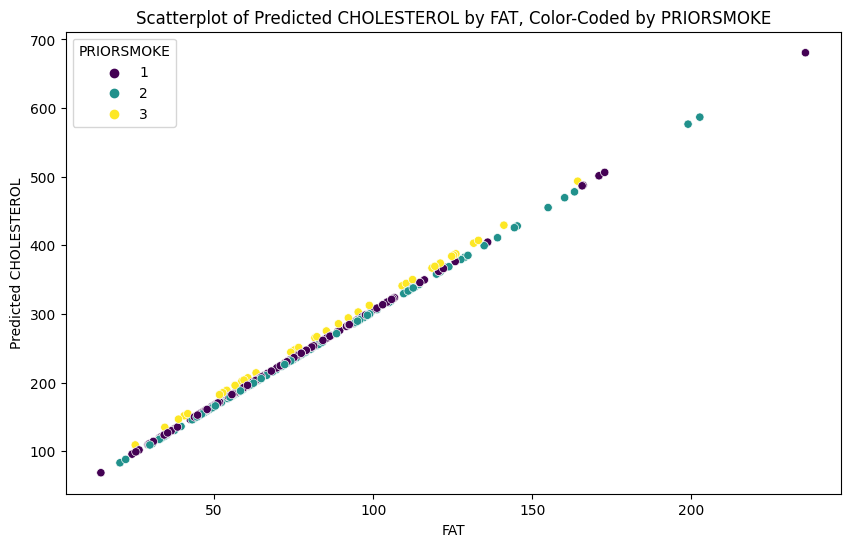

In [36]:
# Importing the necessary library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of Predicted Values for CHOLESTEROL (Y) by FAT (X), Color-Coded by PRIORSMOKE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fat', y='Predicted_Cholesterol', hue='PriorSmoke', palette='viridis', data=nutrition_data_with_dummies)
plt.title('Scatterplot of Predicted CHOLESTEROL by FAT, Color-Coded by PRIORSMOKE')
plt.xlabel('FAT')
plt.ylabel('Predicted CHOLESTEROL')
plt.legend(title='PRIORSMOKE')
plt.show()


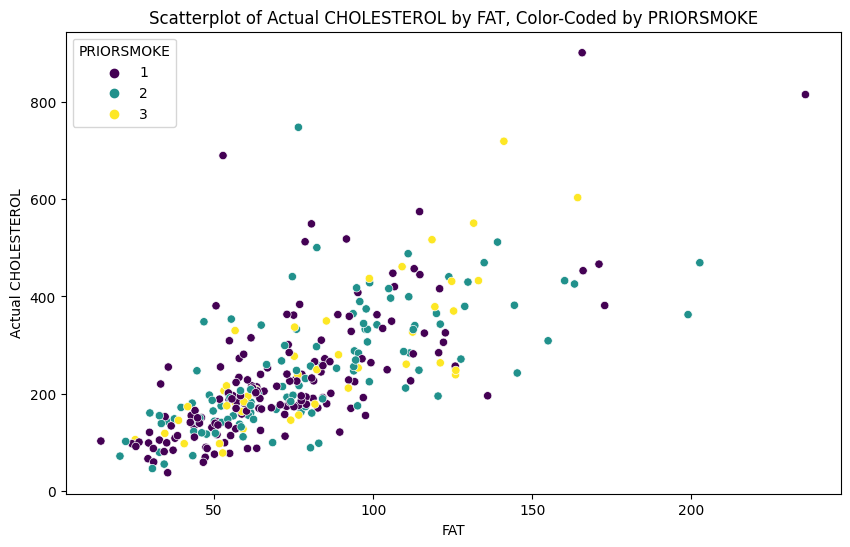

In [37]:
# Scatterplot of Actual Values of CHOLESTEROL (Y) by FAT (X), Color-Coded by PRIORSMOKE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fat', y='Cholesterol', hue='PriorSmoke', palette='viridis', data=nutrition_data_with_dummies)
plt.title('Scatterplot of Actual CHOLESTEROL by FAT, Color-Coded by PRIORSMOKE')
plt.xlabel('FAT')
plt.ylabel('Actual CHOLESTEROL')
plt.legend(title='PRIORSMOKE')
plt.show()

The scatterplot above illustrates the predicted values for "CHOLESTEROL" by "FAT," with data points color-coded by the different groups of the PRIORSMOKE variable.

### Scatterplot of Actual CHOLESTEROL by FAT, Color-Coded by PRIORSMOKE

The scatterplot above illustrates the actual values of "CHOLESTEROL" by "FAT," with data points color-coded by the different groups of the "PRIORSMOKE" variable.

### Analysis and Comparison of Scatterplots

#### Predicted Values Scatterplot:
- The predicted values show a clear positive relationship between "FAT" and "CHOLESTEROL."
- The patterns for different "PRIORSMOKE" groups seem to follow parallel lines, indicating similar slopes.

#### Actual Values Scatterplot:
- The actual values also exhibit a positive relationship between "FAT" and "CHOLESTEROL."
- The patterns for different "PRIORSMOKE" groups are somewhat scattered but still suggest parallel lines.

#### Comparison:
- Comparing the two scatterplots, the ANCOVA model (Model 2) appears to capture the general trend in the data.
- The predicted values align well with the actual values, suggesting a good fit.
- However, there is some scatter around the predicted line, indicating potential room for improvement. A more complex model with additional predictors or interaction terms might capture the data nuances better.

# Task 5

In [38]:
# Creating new product variables by multiplying each of the dummy coded variables for PRIORSMOKE by the FAT variable
nutrition_data_with_dummies['PriorSmoke_2_Fat'] = nutrition_data_with_dummies['PriorSmoke_2'] * nutrition_data_with_dummies['Fat']
nutrition_data_with_dummies['PriorSmoke_3_Fat'] = nutrition_data_with_dummies['PriorSmoke_3'] * nutrition_data_with_dummies['Fat']

# Displaying the first few rows to verify the new product variables
nutrition_data_with_dummies[['PriorSmoke_2', 'PriorSmoke_3', 'Fat', 'PriorSmoke_2_Fat', 'PriorSmoke_3_Fat']].head()


,PriorSmoke_2,PriorSmoke_3,Fat,PriorSmoke_2_Fat,PriorSmoke_3_Fat
0,1,0,57.0,57.0,0.0
1,0,0,50.1,0.0,0.0
2,1,0,83.6,83.6,0.0
3,1,0,97.5,97.5,0.0
4,0,0,82.6,0.0,0.0


In [39]:
# Defining the response variable (Y) and explanatory variables (X's) for Model 3 (Unequal Slopes Model)
Y_model_3 = nutrition_data_with_dummies['Cholesterol']
X_model_3 = nutrition_data_with_dummies[['PriorSmoke_2', 'PriorSmoke_3', 'Fat', 'PriorSmoke_2_Fat', 'PriorSmoke_3_Fat']]
X_model_3 = sm.add_constant(X_model_3) # Adding a constant for the intercept term

# Creating an Unequal Slopes Model (Model 3)
model_3 = sm.OLS(Y_model_3, X_model_3)

# Fitting the model
results_model_3 = model_3.fit()

# Summary of the model, including coefficients, hypothesis test results, and goodness of fit statistics
summary_model_3 = results_model_3.summary()
summary_model_3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cholesterol   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     65.97
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.01e-46
Time:                        04:01:42   Log-Likelihood:                -1870.1
No. Observations:                 315   AIC:                             3752.
Df Residuals:                     309   BIC:                             3775.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.7032     18.275      0.750      0.454     -22.256      49.663
PriorSmoke_2        51.3886     28.287      1.817      0.070      -4.270     107.047
PriorSmoke_3       -32.8823     42.200     -0.779      0.436    -115.919      50.154
Fat                  2.9740      0.232     12.843      0.000       2.518       3.430
PriorSmoke_2_Fat    -0.6839      0.337     -2.031      0.043      -1.347      -0.021
PriorSmoke_3_Fat     0.4858      0.479      1.015      0.311      -0.456       1.428
==============================================================================
Omnibus:                      136.208   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.586
Skew:                           1.729   Prob(JB):                    3.07e-160
Kurtosis:                       9.634   Cond. No.                         796.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction Equation

The prediction equation for the Unequal Slopes Model (Model 3) is given by:

$$ \text{CHOLESTEROL} = 13.70 + 51.39 \times \text{PriorSmoke\_2} - 32.88 \times \text{PriorSmoke\_3} + 2.97 \times \text{Fat} - 0.68 \times \text{PriorSmoke\_2\_Fat} + 0.49 \times \text{PriorSmoke\_3\_Fat} $$

## Interpretation of Coefficients

- **Intercept (13.70):** The predicted cholesterol level when all other variables are zero.

- **PriorSmoke\_2 Coefficient (51.39):** Represents the difference in cholesterol levels between level 2 and level 1 of "PRIORSMOKE," not considering "FAT." It is not statistically significant (p-value = 0.070).

- **PriorSmoke\_3 Coefficient (-32.88):** Represents the difference in cholesterol levels between level 3 and level 1 of "PRIORSMOKE," not considering "FAT." It is not statistically significant (p-value = 0.436).

- **Fat Coefficient (2.97):** Represents the change in cholesterol levels for a one-unit increase in "FAT." It is statistically significant (p-value < 0.001).

- **PriorSmoke\_2\_Fat Coefficient (-0.68):** Interaction term representing the change in slope for "FAT" when "PriorSmoke\_2" is 1. It is significant (p-value = 0.043), suggesting a different slope for this group.

- **PriorSmoke\_3\_Fat Coefficient (0.49):** Interaction term representing the change in slope for "FAT" when "PriorSmoke\_3" is 1. It is not significant (p-value = 0.311).

## Hypothesis Test Results

- **Overall Model Significance:** The model is statistically significant with an F-statistic of 65.97 and a p-value < 0.001.

## Goodness of Fit Statistics

- **R-squared:** 0.516, indicating that approximately 51.6% of the variability in cholesterol levels is explained by the model.

- **Adjusted R-squared:** 0.508, providing an unbiased estimate considering the number of predictors.

## Diagnostic Graphs and Statistics

- **Durbin-Watson:** 2.027, suggesting no significant autocorrelation in the residuals.

- **Omnibus Test:** Significant (p-value < 0.001), indicating non-normality in the residuals.

- **Jarque-Bera Test:** Significant (p-value < 0.001), further supporting non-normality.

## Leverage, Influence, and Outlier Statistics

Detailed examination of leverage, influence, and outlier statistics may be conducted using diagnostic plots and specific statistical measures. The summary provided does not indicate specific concerns regarding these aspects.

## Coefficient Table

| Variable           | Coefficient | Standard Error | t-value | p-value |
|--------------------|-------------|----------------|---------|---------|
| Intercept          | 13.70       | 18.28          | 0.750   | 0.454   |
| PriorSmoke_2       | 51.39       | 28.29          | 1.817   | 0.070   |
| PriorSmoke_3       | -32.88      | 42.20          | -0.779  | 0.436   |
| Fat                | 2.97        | 0.23           | 12.843  | 0.000   |
| PriorSmoke_2_Fat   | -0.68       | 0.34           | -2.031  | 0.043   |
| PriorSmoke_3_Fat   | 0.49        | 0.48           | 1.015   | 0.311   |

# Task 6

In [40]:
# Obtaining the predicted values for "CHOLESTEROL" (Y) using Model 3
predicted_values_model_3 = results_model_3.predict(X_model_3)

# Adding the predicted values to the dataset
nutrition_data_with_dummies['Predicted_Cholesterol_Model_3'] = predicted_values_model_3

# Displaying the first few rows to verify the predicted values for Model 3
nutrition_data_with_dummies[['Cholesterol', 'Predicted_Cholesterol_Model_3', 'Fat']].head()


,Cholesterol,Predicted_Cholesterol_Model_3,Fat
0,170.3,195.628717,57.0
1,75.8,162.702664,50.1
2,257.9,256.545941,83.6
3,332.6,288.378626,97.5
4,170.8,259.358994,82.6


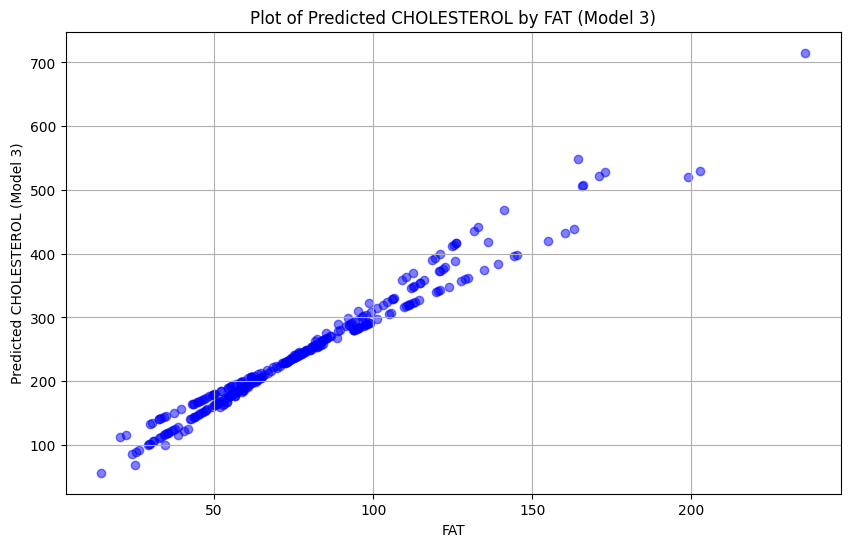

In [41]:
# Plotting the predicted values for CHOLESTEROL (Y) by FAT (X) using Model 3
plt.figure(figsize=(10, 6))
plt.scatter(nutrition_data_with_dummies['Fat'], nutrition_data_with_dummies['Predicted_Cholesterol_Model_3'], c='blue', alpha=0.5)
plt.title('Plot of Predicted CHOLESTEROL by FAT (Model 3)')
plt.xlabel('FAT')
plt.ylabel('Predicted CHOLESTEROL (Model 3)')
plt.grid(True)
plt.show()


## Plot of Predicted CHOLESTEROL by FAT (Model 3)

The plot above illustrates the predicted values for "CHOLESTEROL" by "FAT" using the Unequal Slopes Model (Model 3).

## Observations from the Graph

- The graph exhibits a clear positive relationship between "FAT" and the predicted "CHOLESTEROL" values.
- The points appear to be clustered along a line, reflecting the linear relationship captured by the model.
- The unequal slopes model allows for different slopes for different "PRIORSMOKE" groups, but since we have plotted only the predicted values against "FAT," these differences are not explicitly visible in this plot.
- The scatter around the predicted line is indicative of the variability not explained by the model, highlighting potential room for further refinement.

The plot demonstrates the effectiveness of Model 3 in capturing the underlying trend in the data, while also suggesting areas where the model might be improved or further analyzed.

# Task 7

In [42]:
from scipy import stats

numerator_dof = results_model_3.df_model - results_model_2.df_model
numerator_ssr = results_model_2.ssr - results_model_3.ssr
denominator_dof = results_model_3.df_resid
denominator_ssr = results_model_3.ssr

# Calculating the F-statistic
nested_f_statistic = (numerator_ssr / numerator_dof) / (denominator_ssr / denominator_dof)

# Computing the p-value for the F-test
nested_p_value = 1 - stats.f.cdf(nested_f_statistic, numerator_dof, denominator_dof)

print("nested_f_statistic: ", nested_f_statistic)
print("nested_p_value: ", nested_p_value)


nested_f_statistic:  3.667961661874752
nested_p_value:  0.026646473212354915


## Full and Reduced Models
- **Full Model (Model 3):** Includes "FAT," two dummy-coded "PRIORSMOKE" variables, and two product (interaction) variables.

- **Reduced Model (Model 2):** Includes "FAT" and two dummy-coded "PRIORSMOKE" variables.

## Null and Alternative Hypotheses
- **Null Hypothesis (\(H_0\)):** The slopes are equal; the interaction terms (product variables) in Model 3 are not statistically significant.

- **Alternative Hypothesis (\(H_1\)):** The slopes are unequal; at least one interaction term in Model 3 is statistically significant.

## Nested F-Test

- **F-Statistic for Nested F-Test:** 3.668

- **P-Value:** 0.0266

## Interpretation and Discussion

- The p-value of 0.0266 is less than the common significance level of 0.05, leading us to reject the null hypothesis.

- This result indicates that there is evidence of unequal slopes in this situation, suggesting that the interaction terms in Model 3 are statistically significant.

- Thus, the Unequal Slopes Model (Model 3) provides a better fit to the data compared to the Reduced Model (Model 2), as it accounts for the varying relationships between "FAT" and "CHOLESTEROL" across different levels of "PRIORSMOKE."

- The finding of unequal slopes supports the inclusion of interaction terms in the model, allowing for different relationships between "FAT" and "CHOLESTEROL" for different "PRIORSMOKE" groups.

- It emphasizes the importance of considering potential interactions when modeling complex relationships between variables, as they can provide valuable insights into the underlying patterns in the data.

# Task 8

In [43]:

import numpy as np


bins = [-np.inf, 0, 10, np.inf]
labels = [1, 2, 3]
nutrition_data_with_dummies['ALCOHOL_CONSUMPTION'] = pd.cut(nutrition_data_with_dummies['Alcohol'], bins=bins, labels=labels)


nutrition_data_with_dummies = pd.get_dummies(nutrition_data_with_dummies, columns=['Smoke', 'ALCOHOL_CONSUMPTION', 'Gender'], drop_first=True)

In [44]:
bools1=['Smoke_Yes', 'ALCOHOL_CONSUMPTION_2', 'ALCOHOL_CONSUMPTION_3', 'Gender_Male']
for i in bools1:
    nutrition_data_with_dummies[i] = nutrition_data_with_dummies[i].astype(int)
Y_task_8 = nutrition_data_with_dummies['Cholesterol']
X_task_8 = nutrition_data_with_dummies[['Fat', 'Smoke_Yes', 'ALCOHOL_CONSUMPTION_2', 'ALCOHOL_CONSUMPTION_3', 'Gender_Male']]

# Adding a constant for the intercept term
X_task_8 = sm.add_constant(X_task_8)

# Fitting the multiple linear regression model
model_task_8 = sm.OLS(Y_task_8, X_task_8)
results_task_8 = model_task_8.fit()

# Displaying the summary of the regression model
results_task_8.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cholesterol   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     67.11
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           2.57e-47
Time:                        04:01:43   Log-Likelihood:                -1868.7
No. Observations:                 315   AIC:                             3749.
Df Residuals:                     309   BIC:                             3772.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    31.3999     14.489      2.167      0.031       2.890      59.910
Fat                       2.6917      0.159     16.971      0.000       2.380       3.004
Smoke_Yes                11.0218     15.233      0.724      0.470     -18.951      40.995
ALCOHOL_CONSUMPTION_2    -4.4026     11.194     -0.393      0.694     -26.429      17.623
ALCOHOL_CONSUMPTION_3   -23.8307     21.238     -1.122      0.263     -65.620      17.958
Gender_Male              49.0550     15.877      3.090      0.002      17.813      80.297
==============================================================================
Omnibus:                      129.717   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.509
Skew:                           1.634   Prob(JB):                    4.20e-151
Kurtosis:                       9.487   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Hypotheses
- **Null Hypothesis (H<sub>0</sub>):** The categorical variables "SMOKE," "ALCOHOL CONSUMPTION," and "GENDER," and the continuous variable "FAT" are not predictive of "CHOLESTEROL."
- **Alternative Hypothesis (H<sub>1</sub>\):** At least one of the variables "SMOKE," "ALCOHOL CONSUMPTION," "GENDER," or "FAT" is predictive of "CHOLESTEROL."

Here are the findings from the regression model:

## Regression Model Summary

### Coefficients
- The intercept is 31.3999.
- For every unit increase in "Fat", "Cholesterol" increases by 2.6917 units.
- "Smoke_Yes" increases "Cholesterol" 11.0218 units.
- "ALCOHOL_CONSUMPTION_2" decreases "Cholesterol" by 4.4026 units.
- "ALCOHOL_CONSUMPTION_3" decreases "Cholesterol" by 23.8307 units.
- "Gender_Male" increases "Cholesterol" by 49.0550 units.

### Hypothesis Test Results
- The coefficients for "Fat" and "Gender_Male" are statistically significant (p < 0.05), indicating they have a significant effect on "Cholesterol".
- The coefficients for "Smoke_Yes", "ALCOHOL_CONSUMPTION_2", and "ALCOHOL_CONSUMPTION_3" are not statistically significant (p > 0.05), suggesting they do not have a significant effect on "Cholesterol".

### Goodness of Fit Statistics
- The R-squared value is 0.521, indicating that the model explains about 52.1% of the variability in "Cholesterol".

### Discussion of Results

- The "Fat" and "Gender" variables appear to be the most predictive of "Cholesterol".
- The "Smoke" and "Alcohol Consumption" variables do not seem to have a significant effect on "Cholesterol" in this model.

# Task 9

## Conclusion and Reflection

The assignment provided a good exploration into multiple regression modeling, with a specific focus on handling categorical variables through techniques such as ANOVA, ANCOVA, and Unequal Slopes Models.

### Key Learned Items:
- **Understanding Categorical Variables:** The assignment taught advanced handling of categorical variables, leading to an in-depth understanding of dummy coding, interaction effects, and the transformation of continuous variables into categorical ones.

- **ANOVA and Regression Equivalence:** The revelation that ANOVA models can be expressed as regression models using dummy coded variables was interesting. It combined two very different statistical techniques.

- **ANCOVA and Unequal Slopes Models:** The nested F-test further improved this analysis, validating the necessity of interaction terms in capturing the unequal slopes among different groups.

- **Predictive Analysis:** The final task involved synthesizing the learning to predict cholesterol levels using various factors.

### Challenges and Learning Opportunities:
- **Data Exploration and Transformation:** The lack of a data dictionary demanded careful exploration and interpretation of the dataset.

- **Model Interpretation:** Interpreting coefficients, especially in the context of interactions and dummy coded variables, required careful consideration of the underlying statistical concepts. It reinforced the importance of contextual understanding in translating statistical resulzs.

- **Model Comparison and Selection:** The comparison between nested models provided a practical perspective on model selection and hypothesis testing. It emphasized the iterative nature of statistical modeling, where continuous refinement and validation lead to the best-fitting model.

### Final Thoughts

This assignment served as a comprehensive exercise in multiple regression modeling. It reinforced the concept that statistical modeling is not merely a mechanical application of formulas but a thoughtful process of discovery, interpretation, and communication. The skills and insights gained through this assignment will serve me well in my career.